# Data Visualization/Exploration Project Terrorism 

## Project Motivations 
This project seeks to analyze terrorism Trends from a global perspective as well as from the perspective of Japan and the United States. 


Terrorism Defined: 
"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."


The dataset comes from the Global Terrorism Database which details more than 170,000 terrorist attacks worldwide between 1970 and 2016. 

The recent visitation of the Secretary General to my university (Sophia University in Tokyo, Japan) has also sparked my interest in exploring the trends in this dataset. This assignment was also useful for learning more about python data exploration and visualization. I learned alot of different data exploration techniques and map visualizations through the help of Kaggle. 

The talk can be found at the below link: 
http://webtv.un.org/search/antonio-guterres-un-secretary-general-lecture-on-global-challenges-the-role-of-human-security/5681206747001/?term=Sophia&sort=date

<img src='https://raw.githubusercontent.com/steimel64/steimel64.github.io/master/Notebooks/Terrorism/image.png'>

### Dataset Description 

Information on more than 170,000 Terrorist Attacks

"The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2016 (with annual updates planned for the future). The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 170,000 cases. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland."


## Data Exploration

First, I will Import the relevant packages for this project as well as the dataset. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from pylab import rcParams
import math
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

%matplotlib inline
rcParams['figure.figsize'] = (8,6)
pd.set_option('display.max_columns', None)  

# Hide Warnings 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('globalterrorismdb_0617dist.csv',encoding = 'ISO-8859-1')

## Interesting Features for Visualization 

I examined the data with the info, describe, and head functions to get a feel for the dataset. There are 135 columns and 170,350 entries in the dataset. 

For the purpose of this analysis I will be focusing on Terrorism from a Global perspective, the United States, Japan, as well as any other interesting points I can find. 

I have decided to keep the fields below as they will provide interesting insight into the global history of terrorism. The dataset also contains around 135 columns which will need to be cut down for simplicity. 
* 'eventid'- Unique identifier of each attack. 
* 'iyear' - Year of Attack 
* 'country_txt'- Country of Attack
* 'region_txt'- Region of Attack
* 'provstate'- Province/State of Attack
* 'city' - City of Attack
* 'latitude' - Latitude Location of Attack
* 'longitude' - Longitude Location of Attack
* 'summary' - Summary of Attack
* 'success' - Whether the Attack was successful or not
* 'suicide' - Whether the Attack was a suicide attack or not. 
* 'attacktype1_txt'- Method used to carry out the attack. 
* 'targtype1_txt' - The Target type 
* 'targsubtype1_txt' - The further broken down target type 
* 'target1'- Specific Target of Attack 
* 'natlty1_txt' - Nationality of the Attacker 
* 'gname' - The name of the group responsible for the attack
* 'weaptype1_txt'- Type of weapon used in the attack. 
* 'weapsubtype1_txt'-More specific weapon type. 
* 'nkill' - Number killed in the attack. 
* 'nwound'- Number wounded in the attack. 

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 175.5+ MB


In [5]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.703500e+05,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,165744.000000,165744.000000,170346.000000,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,26631.000000,170350.000000,170350.000000,170350.000000,170350.000000,5630.000000,374.000000,170350.000000,161005.000000,168956.000000,10018.000000,9601.000000,9706.000000,1034.000000,961.000000,1006.000000,169971.000000,1681.000000,265.000000,170350.000000,99226.000000,100851.000000,104216.000000,16248.000000,1617.000000,532.000000,263.000000,120.000000,4755.000000,170350.000000,150924.000000,11843.000000,10475.000000,1660.000000,1507.000000,74.000000,71.000000,160668.000000,105891.000000,103687.000000,155025.000000,105640.000000,101601.000000,170350.000000,60545.000000,3.548700e+04,170172.000000,12492.000000,12437.000000,3701.000000,7408.000000,76313.000000,1.279000e+03,4.960000e+02,7.070000e+02,487.000000,9911.000000,9322.000000,170350.000000,170350.000000,170350.000000,170350.000000
mean,2.001776e+11,2001.709997,6.474365,15.466845,0.043634,132.526669,7.091441,23.399774,26.350909,1.454428,0.067790,0.988441,0.992985,0.879818,-0.572069,1.294957,0.134206,0.896396,0.033871,3.220211,3.672647,5.109626,8.399654,46.865358,127.734605,10.202436,28.365170,132.039769,9.882012,55.068678,139.612326,0.084356,0.264723,0.184906,0.002483,-63.924536,-1.482266,0.027808,7.007386,0.237477,7.218045,0.448669,7.091667,-6.421241,6.428576,11.022879,6.741366,10.673317,6.869880,11.507631,6.243243,10.788732,2.387246,0.050033,0.478864,3.200239,0.041982,0.097322,-0.505970,3.299777,2.290570e+05,0.059181,4.512008,-0.378226,-42.753783,-31.886744,-0.144051,3.224502e+06,4.519918e+05,3.849663e+05,272.462012,4.624458,-28.717335,-4.583387,-4.510555,0.091083,-3.975128
std,1.314444e+09,13.144146,3.392364,8.817929,0.204279,112.848161,2.949206,18.844885,58.570068,1.009005,0.286731,0.106888,0.083461,0.325175,2.526694,0.692270,0.340875,0.304747,0.180899,1.891227,2.245530,2.263183,6.648615,30.940677,88.317182,5.736480,27.024614,125.947163,5.803961,26.677579,153.771002,0.277921,0.441317,0.388956,0.049769,227.997149,12.732807,1.140167,2.578695,1.035511,2.795849,0.498306,2.743965,4.162690,2.152366,6.402793,2.196341,7.535557,2.157719,8.352011,1.497128,8.146718,11.327709,5.969660,4.190902,34.647365,3.219002,1.449435,3.095503,0.490277,1.627247e+07,0.444913,204.474914,7.069935,85.111997,118.807885,1.198657,3.090625e+07,6.070186e+06,2.435027e+06,3130.068208,2.041008,58.737198,4.542694,4.630440,0.583166,4.691492
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-

## Dropping Some columns for ease of analysis 
I have already specified which columns I will keep so I will perform the steps required to drop the unnecessary columns as well as renaming them for ease of understanding. I have also added a Casualties column which was not previously in the dataset. Casualties can be defined as the total killed + wounded in an attack. 

In [6]:
keepcolumn =['eventid','iyear','country_txt','region_txt','provstate','city','latitude','longitude','summary','success',
             'suicide','attacktype1_txt','targtype1_txt','targsubtype1_txt','target1','natlty1_txt','gname','weaptype1_txt',
             'weapsubtype1_txt','nkill','nwound']

In [7]:
data = data.loc[:,data.columns.isin(keepcolumn)]

In [8]:
data.columns = ['Id','Year','Country','Region','Provstate','City','Latitude','Longitude','Summary',
               'Success','Suicide','Attacktype','Targettype','Targetsubtype','Target',
               'Nationality','Group','Weapontype','Weaponsubtype','Killed','Wounded']

In [9]:
data['Casualties'] = data['Killed']+ data['Wounded']
data['Casualties'] = data['Casualties'].fillna(0)

## Clean Data 
The Head function reveals that the data is now clean and ready for analysis/visualization. 

In [10]:
data.head()

,Id,Year,Country,Region,Provstate,City,Latitude,Longitude,Summary,Success,Suicide,Attacktype,Targettype,Targetsubtype,Target,Nationality,Group,Weapontype,Weaponsubtype,Killed,Wounded,Casualties
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,1,0,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,Unknown,NaN,1.0,0.0,1.0
1,197000000002,1970,Mexico,North America,NaN,Mexico city,19.432608,-99.133207,NaN,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown,NaN,0.0,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,Unknown,NaN,1.0,0.0,1.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,37.983773,23.728157,NaN,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,NaN,0.0
4,197001000003,1970,Japan,East Asia,NaN,Fukouka,33.580412,130.396361,NaN,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,Incendiary,NaN,NaN,NaN,0.0


## I. Global Terrorism Trends 

First, I will visualize some global terrorism trends and further extrapolate on any findings. 

### 1.1 Trend of Terrorist Attacks by Year 

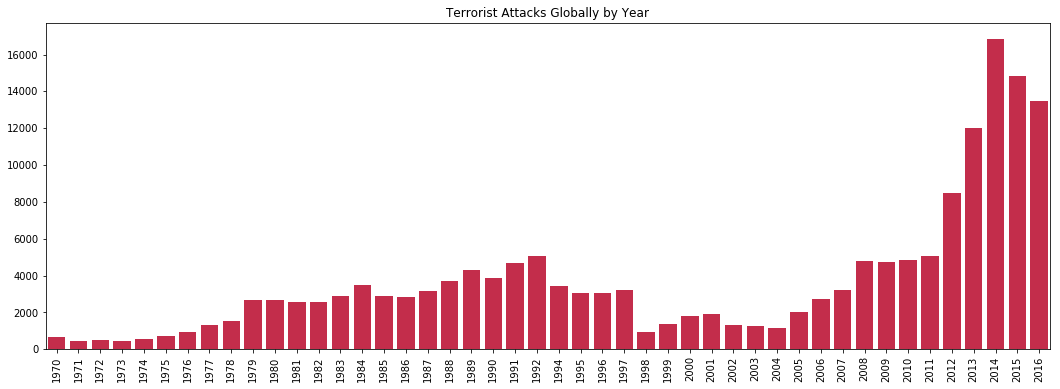

In [11]:
plt.subplots(figsize=(18,6))
sns.barplot(data['Year'].value_counts().index,data['Year'].value_counts().values,color='crimson')
plt.title('Terrorist Attacks Globally by Year')
plt.xticks(rotation=90)
plt.show()

The first trend I decided to explore was total terrorist attacks by year globally. It looks like in terms of attack totals that there has been an upward trend, especially since the early 2000's. In the 1970's we had around 400-500 attacks per year which has now climbed to around 15,000 a year recently. 

### 1.2 Successful Terrorist Attacks by Year 

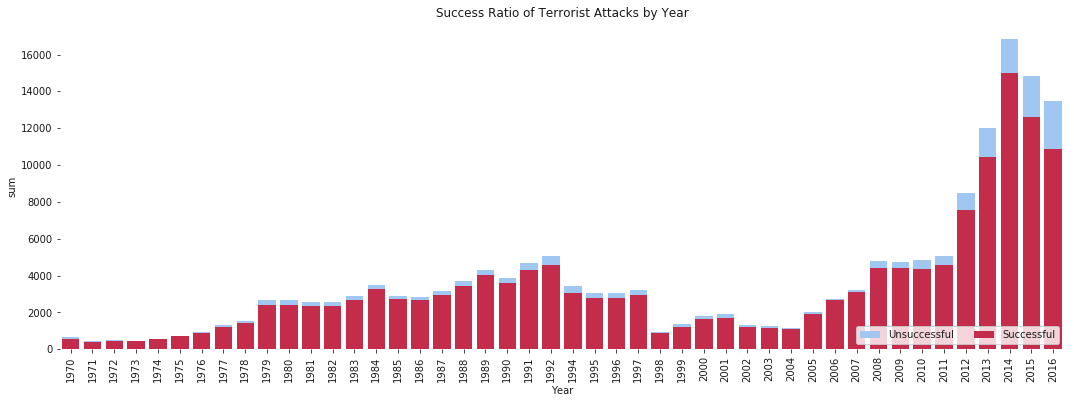

In [12]:
## Successful Attacks DF
Successtrend = data.groupby('Year')['Success'].agg(['sum','count'])
Successtrend['Ratio'] = Successtrend['sum']/Successtrend['count']
Successtrend

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(18, 6))

# Plot the attacks that were unsuccessful
sns.set_color_codes("pastel")
sns.barplot(x=Successtrend.index, y='count', data=Successtrend,
            label="Unsuccessful", color="b")

# Plot the attacks that were successful
sns.set_color_codes("muted")
sns.barplot(x=Successtrend.index, y='sum', data=Successtrend,
            label="Successful", color="crimson")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
plt.title('Success Ratio of Terrorist Attacks by Year')
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)

The next graph examines the Success Ratio of Terrorist attacks. It seems that the rate looms around 80-90 % success rate a year which indicates that terrorist attacks are highly effective at impacting their targets when executed. Red indicates Success while blue indicates failure. 

### 1.3 Ten Countries with the most Terrorist Attacks 

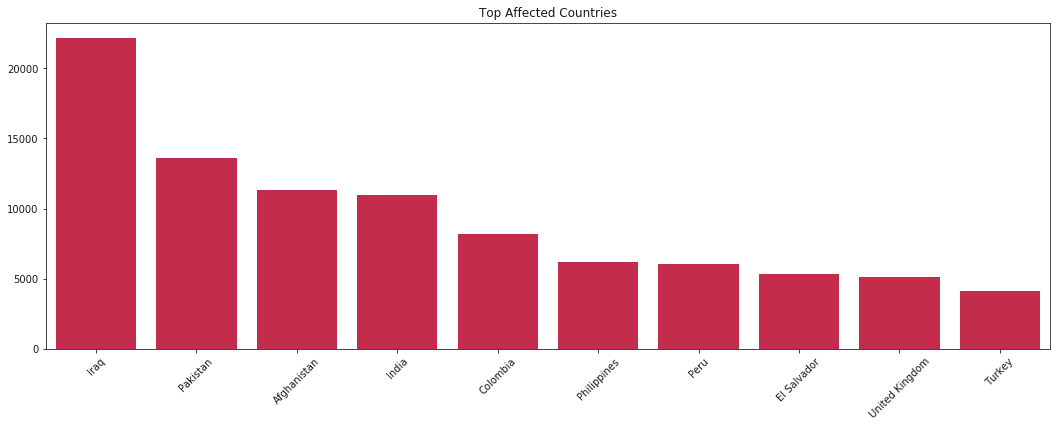

In [13]:
plt.subplots(figsize=(18,6))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,color='crimson')
plt.title('Top Affected Countries')
plt.xticks(rotation=45)
plt.show()

The next graph examines the top affected countries by Terrorist Attacks. The top 10 countries that are impacted by terrorist attacks include Iraq, Pakistan, Afghanistan, India, Colombia, Philippines, Peru, El Salvador, United Kingdom, Turkey. One country that stuck out for me was the United Kingdom as I had no idea it would end up on the top 10 list. 

### 1.4 Terrorist Attacks by Region 

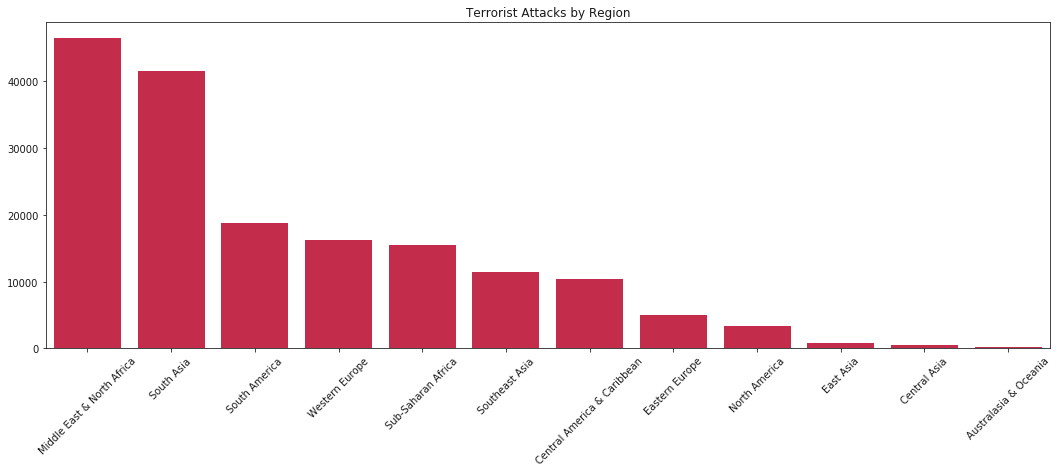

In [14]:
plt.subplots(figsize=(18,6))
sns.barplot(data['Region'].value_counts().index,data['Region'].value_counts().values,color='crimson')
plt.title('Terrorist Attacks by Region')
plt.xticks(rotation=45)
plt.show()

### 1.4.2 Terrorist Attacks by Region broken down by Attack Type

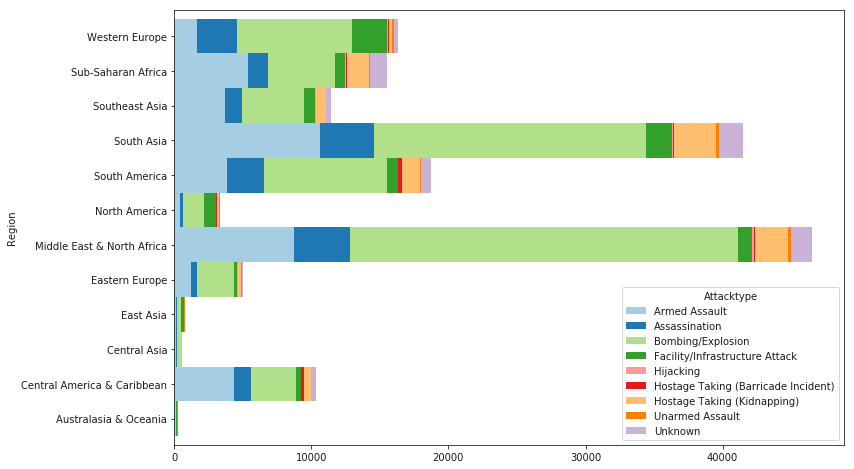

In [15]:
##Attack Types by Region 
pd.crosstab(data.Region,data.Attacktype).plot.barh(stacked=True,width=1,color=sns.color_palette('Paired', 9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

The data reveals that the regions with the most terrorist attacks include the Middle East/North Africa and South Asia. North America, East Asia, Central Asia, and Australasia & Oceania seem to be relatively safe in comparison.

Further examination of the all the regions reveals that Bombing/Explosion and Armed Assault are the top two types of attacks. 

### 1.5 Terrorist Attacks by Method 

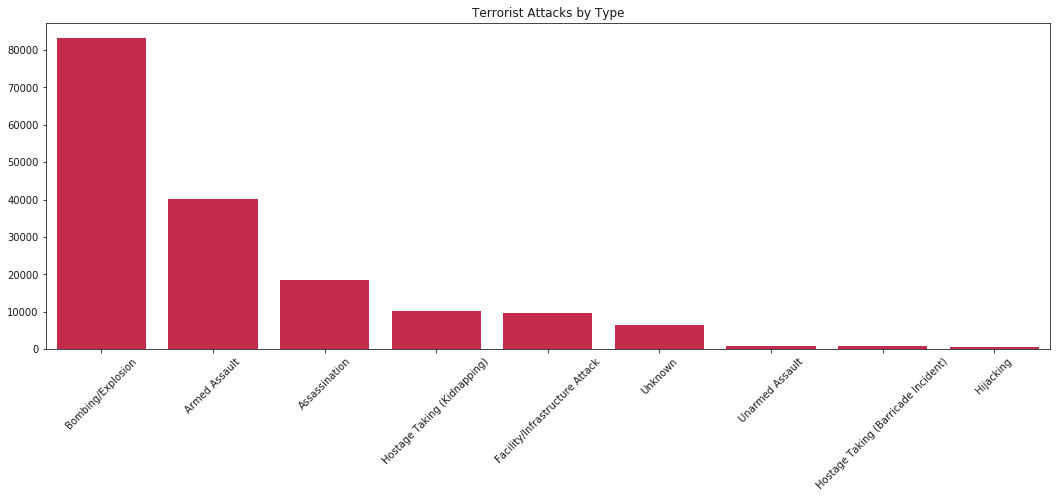

In [16]:
## Terrorist Attacks by Method
plt.subplots(figsize=(18,6))
sns.barplot(data['Attacktype'].value_counts().index,data['Attacktype'].value_counts().values,color='crimson')
plt.title('Terrorist Attacks by Type')
plt.xticks(rotation=45)
plt.show()

As mentioned above, Bombing/Explosion and Armed Assault are the most common types of terrorist attack. Other common attack types also include Assasination,Hostage Taking, and Facility/Infrastructure Attacks. 

### 1.6 Suicide Attacks in the Aggregate 

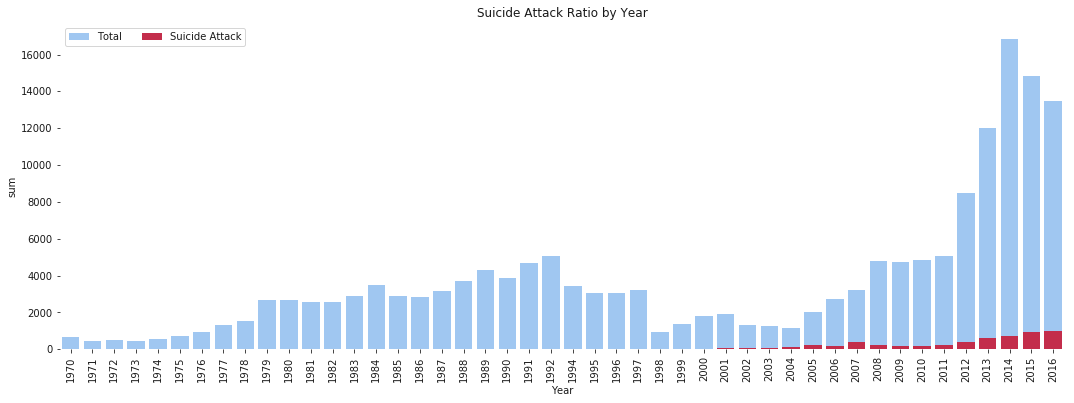

In [17]:
## Sucide Attacks DF
Suicidetrend = data.groupby('Year')['Suicide'].agg(['sum','count'])
Suicidetrend['Ratio'] = Suicidetrend['sum']/Suicidetrend['count']
Suicidetrend

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(18, 6))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=Suicidetrend.index, y='count', data=Suicidetrend,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=Suicidetrend.index, y='sum', data=Suicidetrend,
            label="Suicide Attack", color="crimson")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="top left", frameon=True)
plt.title('Suicide Attack Ratio by Year')
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)

When first opening this dataset, I was also very curious to explore the amount of attacks classified as suicide in the dataset. Suicide attacks seem to be a relatively recent trend beginning from around year 2001.  Suicide attacks take up less of the ratio of attacks than I previously thought they would based on what I experienced from media coverage. 

Before 2001 the data has no sign of any suicide attacks. Perhaps this data was not collected until 2001 or an upward trend was influenced by the September 11th attacks. 

### 1.7 Terrorist Attacks by Target Type

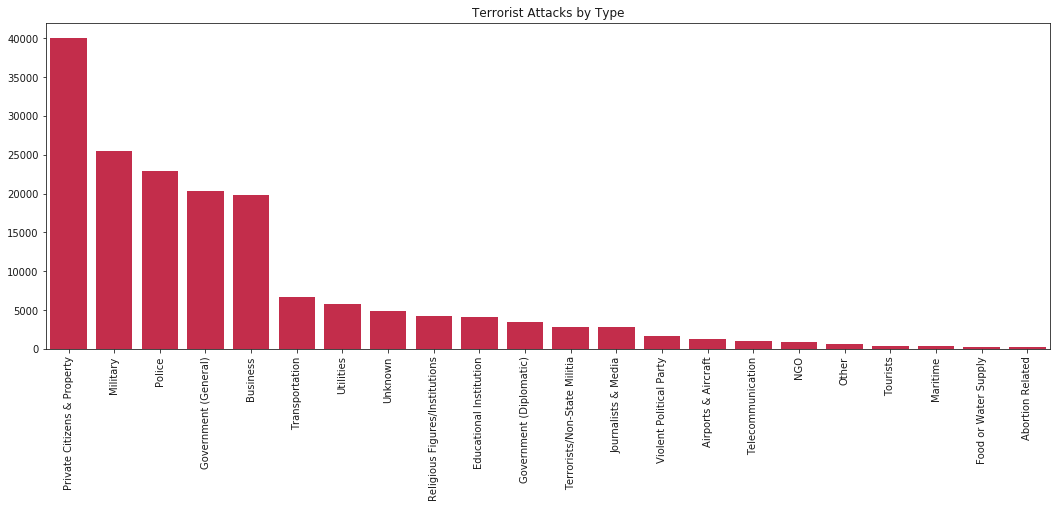

In [18]:
plt.subplots(figsize=(18,6))
sns.barplot(data['Targettype'].value_counts().index,data['Targettype'].value_counts().values,color='crimson')
plt.title('Terrorist Attacks by Type')
plt.xticks(rotation=90)
plt.show()

Previously I examined terrorist attacks based on their Attack types but the dataset also contains information on the type of target in the attack. Globally the top 5 target types were classified as Private Citizens & Property, Military, Police, Government, and Business. 

### 1.8 Top Ten Terrorist Groups with the most attacks 

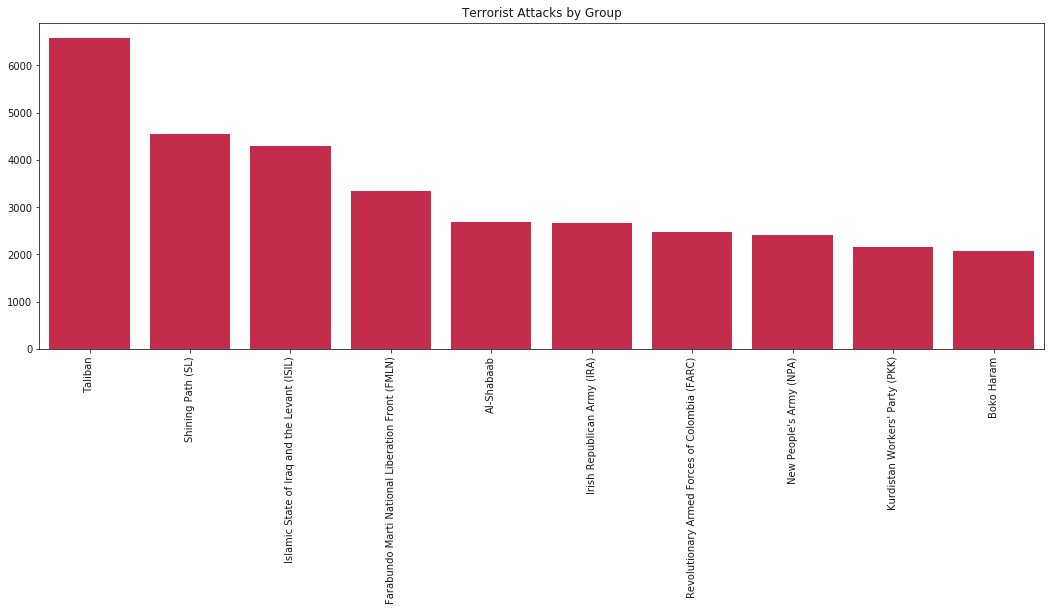

In [19]:
plt.subplots(figsize=(18,6))
sns.barplot(data['Group'].value_counts()[1:11].index,data['Group'].value_counts()[1:11].values,color='crimson')
plt.title('Terrorist Attacks by Group')
plt.xticks(rotation=90)
plt.show()

Next I will further explore terrorist group activities in the dataset. There are many unknowns in the group field but based on data, the 10 groups with the most terrorist attacks include the Taliban, Shining Path(SL), Islamic State of Iraq and the Levant (ISIL), Farabundo Marti National Liberation Front (FMLN), Al-Shabaab, Irish Republican Army(IRA), Revolutionary Armed Forces of Colombia (FARC), New People's Army (NPA), Kurdistan Workers' Party (PKK), and Boko Haram. 

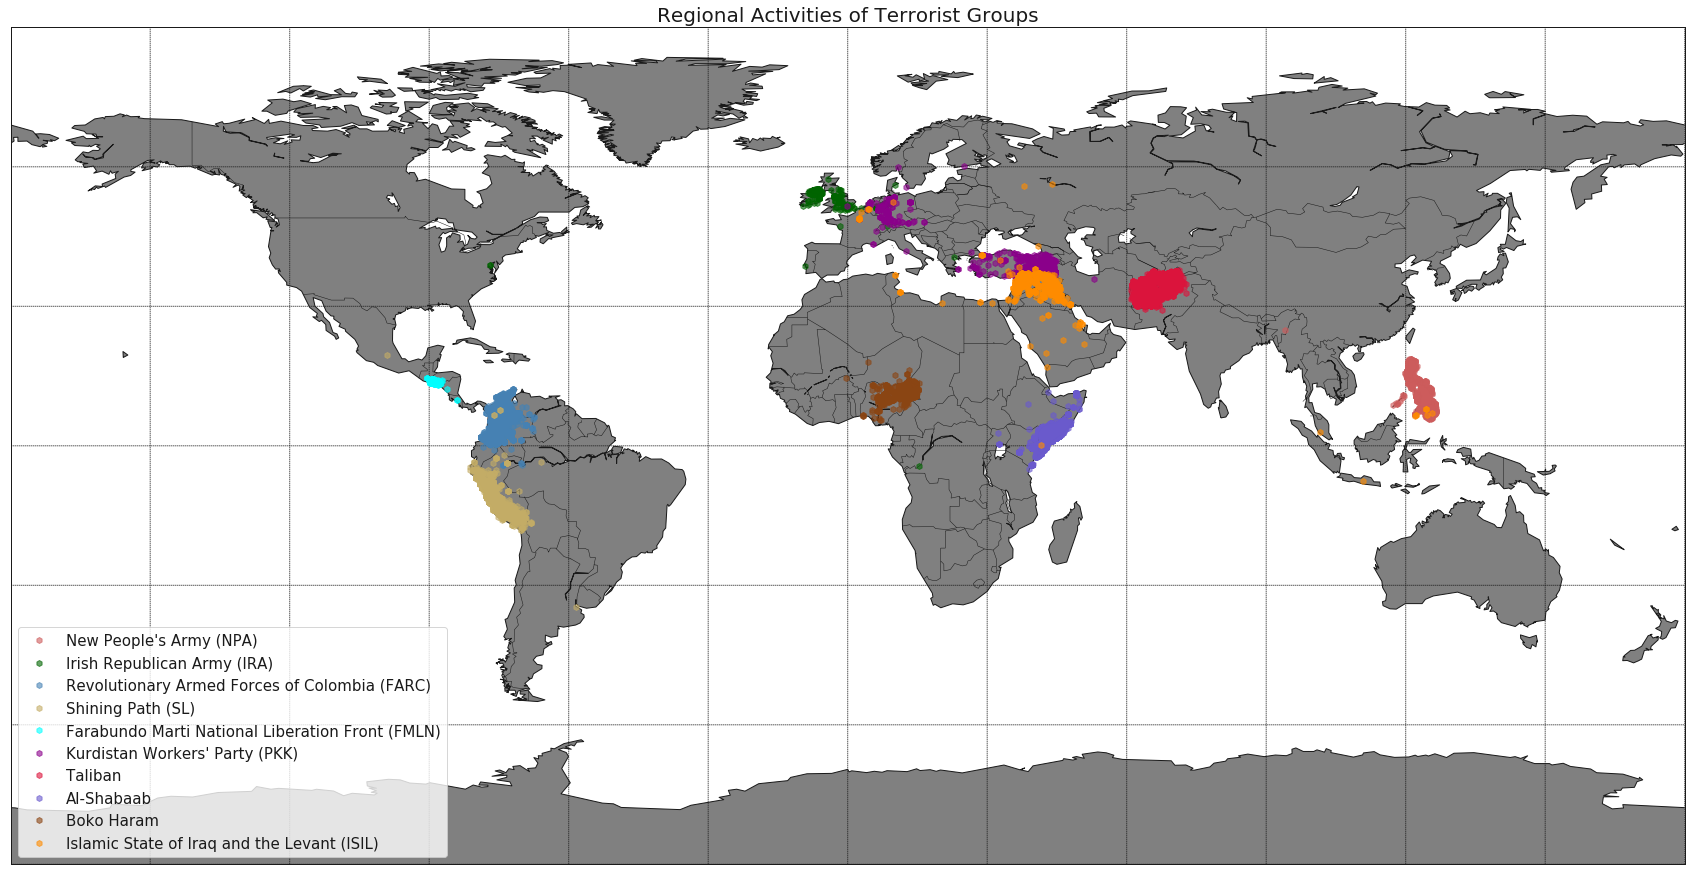

In [20]:
##Groupplot DF 
topgroup = list(data['Group'].value_counts()[1:11].index)
groupplot = data[data['Group'].isin(topgroup)]
plt.subplots(figsize=(30,20))

# creating a Basemap object
gp = Basemap(projection='cyl')
gp.drawcoastlines()
gp.drawcountries()
gp.fillcontinents(color = 'gray')
gp.drawmapboundary()
gp.drawmeridians(np.arange(0, 360, 30))
gp.drawparallels(np.arange(-90, 90, 30))

colors=['indianred','darkgreen','steelblue','y','cyan','darkmagenta','crimson','slateblue','saddlebrown','darkorange']
group=list(groupplot['Group'].unique())
def group_point(group,color,label):
    lat_group=list(groupplot[groupplot['Group']==group].Latitude)
    long_group=list(groupplot[groupplot['Group']==group].Longitude)
    x,y = gp(long_group,lat_group)
    gp.plot(x,y,'ro',markersize=6,color=j,label=i,alpha=.6,marker='h')
for i,j in zip(group,colors):
    group_point(i,j,i)  
legend=plt.legend(loc='lower left',frameon=True,prop={'size':15},fontsize = 'large')
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups',fontsize=20)
plt.show()

Examining these groups further on a map reveals that the groups are highly concentrated for the most part regarding regions they operate in.

A Few Examples: 
* Boko Haram in West Africa 
* Shining Path in Western South America 
* Taliban in Afghanistan  
* New People's Army (NPA) in the Phillippines 
* Irish Republican Army (IRA) in the UK / Ireland

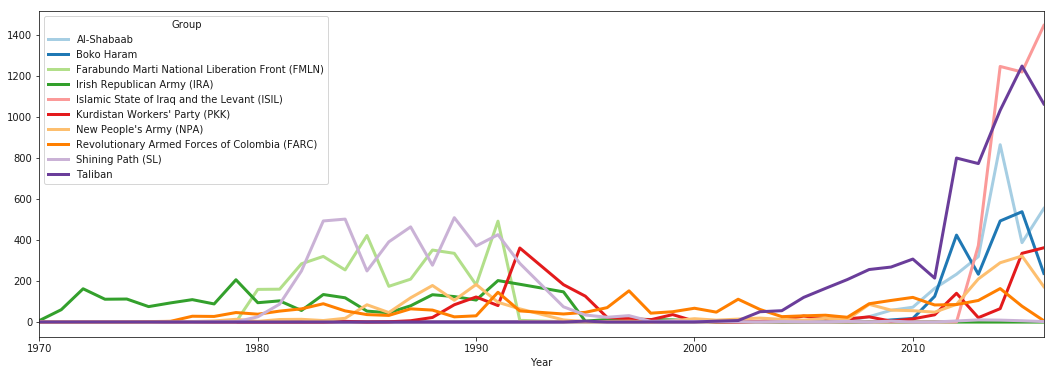

In [21]:
pd.crosstab(groupplot.Year,groupplot.Group).plot(kind='line',color=sns.color_palette('Paired', 10),linewidth=3)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

The next graph visualizes these groups terrorist activities on a time series chart by year.

** Some key trends I noticed in the above: **  

* The IRA activities were more concentrated beginning in the 1970's and ending around the mid 90's. (IRA isn't really so active anymore)  
* FARC has been relatively consistent on their attacks for the last 30 years in terms of volume. 
* ISIL and and Taliban Attacks are currently on the rise, especially in the last 5-10 years.
 * ISIL attacks have increased rapidly in the last 5 years possibly indicating major growth in their membership. 
 * Taliban attacks have been slightly down in the last 3-5 years. (Possibly due to ISIL?) 
* In addition to ISIL and Taliban other groups that are extremely active now include Al-Shabaab, Boko Haram, PKK, and the NPA. 


### 1.9 Casualties

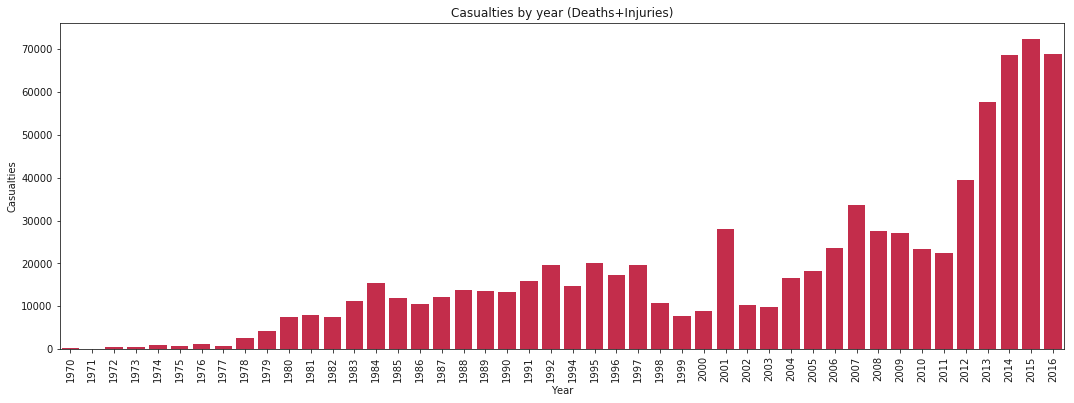

In [22]:
## Casualty Trend 
Casualtytrend = data.groupby(["Year"])["Casualties"].sum()

plt.subplots(figsize=(18,6))
sns.barplot(Casualtytrend.index,Casualtytrend,color='crimson')
plt.title('Casualties by year (Deaths+Injuries)')
plt.xticks(rotation=90)
plt.show()

In a perfect world we would love to have no casualties or even a world with no terrorist attacks. However, this is unfortunately not always possible. The next visualization details the Casualties by year which is the Deaths + Injuries for each attack. Much like the total attacks trend, casualties are also on an upward trend. 

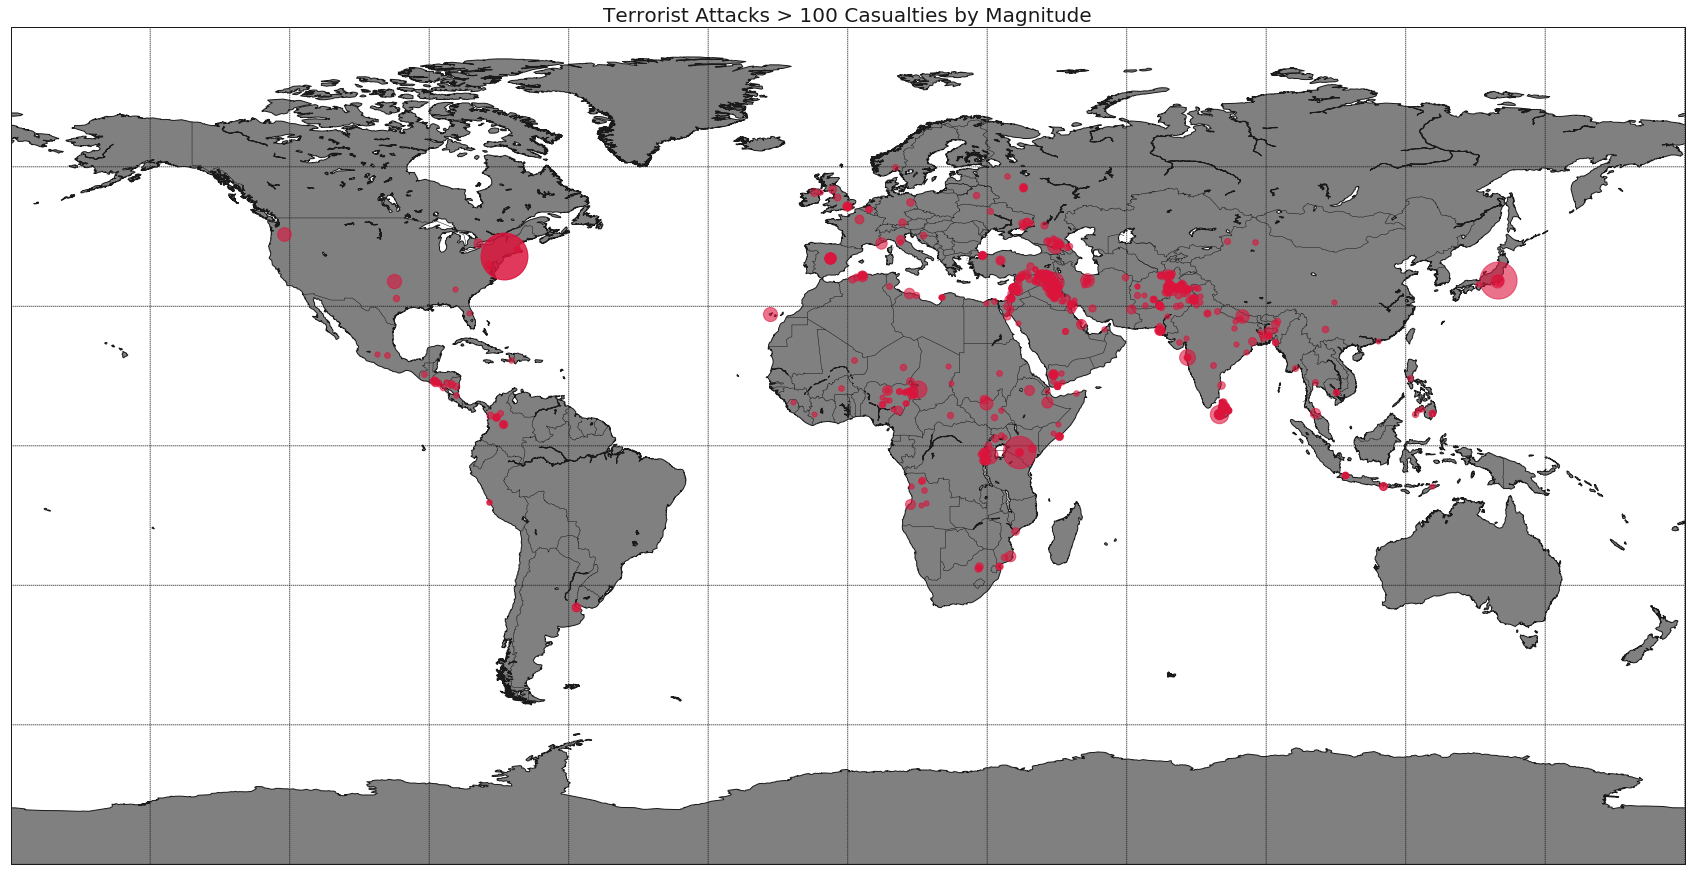

In [23]:
## DF where Casualties > 100 
Cas = data[data['Casualties'] > 100] 

plt.subplots(figsize=(30,20))

# Create empty lists for the latitudes and longitudes.
lats, lons, magnitudes = [], [], []

lats = list(Cas['Latitude'])
lons = list(Cas['Longitude'])
magnitudes = list(Cas['Casualties'])
 
# --- Build Map ---
mag_map = Basemap(projection='cyl', resolution = 'l')
mag_map.drawcoastlines()
mag_map.drawcountries()
mag_map.fillcontinents(color = 'gray')
mag_map.drawmapboundary()
mag_map.drawmeridians(np.arange(0, 360, 30))
mag_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = .5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = mag_map(lon, lat)
    msize = math.sqrt(mag) * min_marker_size
    mag_map.plot(x, y, 'ro', markersize=msize,alpha=.6,color='crimson')
plt.title('Terrorist Attacks > 100 Casualties by Magnitude',fontsize=20)
plt.show()

Around 740 of the attacks had more than 100 casualties. The above graph details these attacks on the map relative to their casualty counts. It looks like Japan and the US have had the attacks with the biggest casualty counts in the world. It will be interesting to further explore these countries later in the analysis.

In [24]:
Cas = Cas.sort_values(by=['Casualties'], ascending=False)
Cas.head(10)

,Id,Year,Country,Region,Provstate,City,Latitude,Longitude,Summary,Success,Suicide,Attacktype,Targettype,Targetsubtype,Target,Nationality,Group,Weapontype,Weaponsubtype,Killed,Wounded,Casualties
73054,200109110004,2001,United States,North America,New York,New York City,40.712784,-74.005941,09/11/2001: This was one of four related attac...,1,1,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Passengers and crew members on American Airlin...,United States,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,NaN,1383.0,7366.0,8749.0
73055,200109110005,2001,United States,North America,New York,New York City,40.712784,-74.005941,09/11/2001: This was one of four related attac...,1,1,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Passengers and crew members on United Airlines...,United States,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,NaN,1382.0,7365.0,8747.0
58770,199503200014,1995,Japan,East Asia,NaN,Tokyo,35.685826,139.756684,NaN,1,0,Unarmed Assault,Transportation,Subway,Subway system,Japan,Aum Shinri Kyo,Chemical,NaN,13.0,5500.0,5513.0
67999,199808070002,1998,Kenya,Sub-Saharan Africa,Nairobi,Nairobi,-1.285180,36.821107,08/07/1998: Suicide attackers detonated a vehi...,1,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,"United States Embassy in Nairobi, Kenya",United States,Al-Qaida,Explosives/Bombs/Dynamite,Vehicle,224.0,4000.0,4224.0
159418,201603080001,2016,Iraq,Middle East & North Africa,Kirkuk,Taza Khurmatu,35.299516,44.328417,03/09/2016: Assailants fired 60 rockets holdin...,1,0,Bombing/Explosion,Private Citizens & Property,Village/City/Town/Suburb,Subdistrict,Iraq,Islamic State of Iraq and the Levant (ISIL),Chemical,Explosive,3.0,1500.0,1503.0
61476,199601310002,1996,Sri Lanka,South Asia,Western,Colombo,6.927079,79.861243,NaN,1,1,Bombing/Explosion,Business,Bank/Commerce,Bank,Sri Lanka,Liberation Tigers of Tamil Eelam (LTTE),Explosives/Bombs/Dynamite,Vehicle,90.0,1272.0,1362.0
55860,199404130008,1994,Rwanda,Sub-Saharan Africa,Kigali,Gikoro,-1.932787,30.332456,NaN,1,0,Armed Assault,Private Citizens & Property,Religion Identified,Group of Tutsi Refugees inside Catholic Church,Rwanda,Hutu extremists,Firearms,Automatic Weapon,1180.0,0.0,1180.0
85571,200802010006,2008,Chad,Sub-Saharan Africa,N'Djamena,N'Djamena,12.120819,15.086542,2/2/2008: Chadian rebels attacked the capital ...,1,0,Armed Assault,Government (General),Head of State,President Idriss Deby,Chad,Rebels,Firearms,Automatic Weapon,160.0,1001.0,1161.0
76861,200409010002,2004,Russia,Eastern Europe,North Ossetia-Alania (Republic),Beslan,43.191626,44.541763,09/01/2004: A group of thirty to thirty-five a...,1,1,Hostage Taking (Barricade Incident),Educational Institution,School/University/Educational Building,"School Number One (SNO) in Beslan, Russia",Russia,Riyadus-Salikhin Reconnaissance and Sabotage B...,Explosives/Bombs/Dynamite,Suicide (carried bodily by human being),344.0,727.0,1071.0
80997,200607120001,2006,India,South Asia,Maharashtra,Mumbai,19.075984,72.877656,07/11/2006: A series of train bombings killed ...,1,0,Bombing/Explosion,Transportation,Train/Train Tracks/Trolley,People in rush hour,India,Lashkar-e-Taiba (LeT),Explosives/Bombs/Dynamite,Unknown Explosive Type,188.0,817.0,1005.0


Further exploration of the data with the head function gives us the top 10 attacks in regards to casualties. 

These attacks were the 9/11 Al-Qaida Hijacking Attacks in NYC and the subway attack in Tokyo by Aum Shinri Kyo. 

## II. Terrorism in Japan 

For the next part of this analysis, I will be looking into the Terrorism Trends in Japan. 

In [25]:
## Japan DF
Japan = data[data['Country'] == 'Japan']
Japan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 4 to 164813
Data columns (total 22 columns):
Id               401 non-null int64
Year             401 non-null int64
Country          401 non-null object
Region           401 non-null object
Provstate        61 non-null object
City             401 non-null object
Latitude         394 non-null float64
Longitude        394 non-null float64
Summary          43 non-null object
Success          401 non-null int64
Suicide          401 non-null int64
Attacktype       401 non-null object
Targettype       401 non-null object
Targetsubtype    364 non-null object
Target           400 non-null object
Nationality      398 non-null object
Group            401 non-null object
Weapontype       401 non-null object
Weaponsubtype    190 non-null object
Killed           372 non-null float64
Wounded          374 non-null float64
Casualties       401 non-null float64
dtypes: float64(5), int64(4), object(13)
memory usage: 72.1+ KB


A new dataset created with just the Japan flagged values has 401 entries. 

In [26]:
401 / 170350 

0.0023539771059583213

Japan makes up around .002 % of attacks in the dataset which isn't very much in comparison to the total.

### 2.1 Terrorism in Japan Map/Trends

This section gives a general overview on Terrorism trends in Japan as well as locations of impact. 

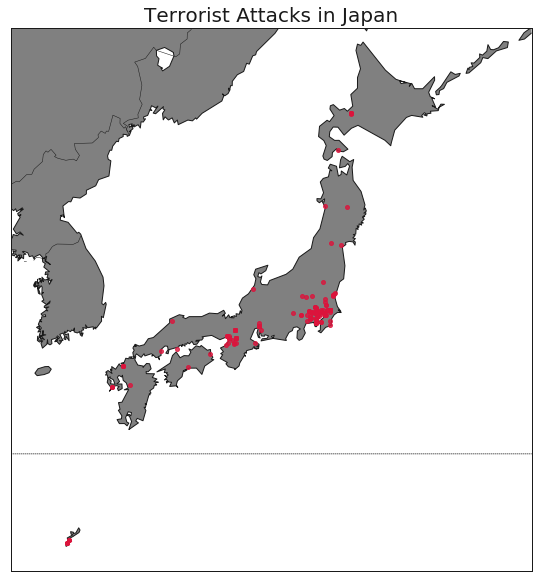

In [27]:
## Japan Map
plt.subplots(figsize=(30,10))
# setting the two corners of the map 
lon0, lat0 = (125, 25)
lon1, lat1 = (150, 46)
lats = list(Japan['Latitude'])
lons = list(Japan['Longitude'])
magnitudes = list(Japan['Casualties'])

# creating a Basemap object
j = Basemap(projection='merc',llcrnrlon=lon0, llcrnrlat=lat0,
            urcrnrlon=lon1, urcrnrlat=lat1,  resolution='l')
j.bluemarble()
j.drawcoastlines()
j.drawcountries()
j.fillcontinents(color = 'gray')
j.drawmapboundary()
j.drawmeridians(np.arange(0, 360, 30))
j.drawparallels(np.arange(-90, 90, 30))

x,y = j(lons, lats)
j.plot(x, y, 'ro', markersize=4,color='crimson',alpha=.8)
plt.title('Terrorist Attacks in Japan', size=20)
plt.show()


A plot of all the attacks in Japan reveals that they are highly concentrated around cities like Tokyo and Osaka or the two most populated cities in Japan. 

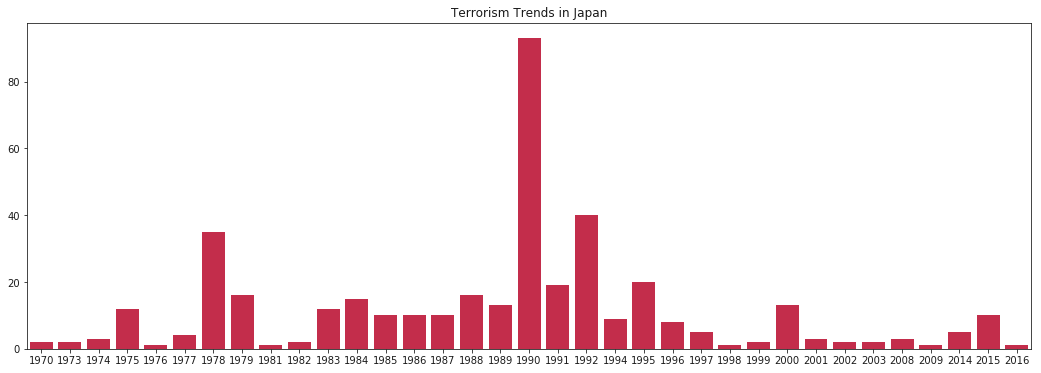

In [28]:
plt.subplots(figsize=(18,6))
sns.barplot(Japan['Year'].value_counts().index,Japan['Year'].value_counts().values,color='crimson')
plt.title('Terrorism Trends in Japan')
plt.show()

The next trend illustrates the total Terrorist attacks in Japan from 1970 - 2016. The trend of attacks seems to be relatively stable other than the year 1990/1992/1995. I wonder what happened in 1990/1992/1995. It is also interesting that the three most impacting years in Japan were 1990, 1992, and 1995 which was around when Japan's Bubble Era and economic uncertainty began.  

### 2.2 Terror in Japan (1990,1992,1995) - The Bubble Era 

In [29]:
year = [1990,1992,1995]
Japanspike = Japan[Japan['Year'].isin(year)]
Japanspike = Japanspike.sort_values(by=['Casualties'], ascending=False)
Japanspike.head()

,Id,Year,Country,Region,Provstate,City,Latitude,Longitude,Summary,Success,Suicide,Attacktype,Targettype,Targetsubtype,Target,Nationality,Group,Weapontype,Weaponsubtype,Killed,Wounded,Casualties
58770,199503200014,1995,Japan,East Asia,NaN,Tokyo,35.685826,139.756684,NaN,1,0,Unarmed Assault,Transportation,Subway,Subway system,Japan,Aum Shinri Kyo,Chemical,NaN,13.0,5500.0,5513.0
58967,199504190006,1995,Japan,East Asia,NaN,Yokohama,35.443708,139.638026,NaN,1,0,Unarmed Assault,Transportation,Train/Train Tracks/Trolley,railroad station,Japan,Unknown,Chemical,NaN,0.0,671.0,671.0
44130,199010090002,1990,Japan,East Asia,NaN,osaka,34.693738,135.502165,NaN,1,0,Armed Assault,Police,Police Security Forces/Officers,unit,Japan,Unknown,Incendiary,NaN,0.0,106.0,106.0
59655,199507020007,1995,Japan,East Asia,NaN,Yokohama,35.443708,139.638026,NaN,1,0,Unarmed Assault,Transportation,Subway,subway station,Japan,Unknown,Chemical,NaN,0.0,36.0,36.0
44397,199011010002,1990,Japan,East Asia,NaN,Tokyo,35.685826,139.756684,NaN,1,0,Bombing/Explosion,Police,"Police Building (headquarters, station, school)",Seiwa Dormitory,Japan,Revolutionary Workers' Council (Kakurokyo),Explosives/Bombs/Dynamite,Unknown Explosive Type,1.0,6.0,7.0


It looks like in 1995 Japan was impacted by the Aum Shinri Kyo Attacks which wounded 5500 and killed 13. Another chemical attack also happened in Yokohama at a railroad station wounding 671. The third most damaging attack was an armed assault on Police classified as incendiary based wounding 106. 

Chemical/Incendiary attacks seem to have taken the biggest toll on Japan from a casualty perspective. 

### 2.3 Terrorist Groups in Japan

This section visualizes historical trends related to terrorist groups operating in Japan. 

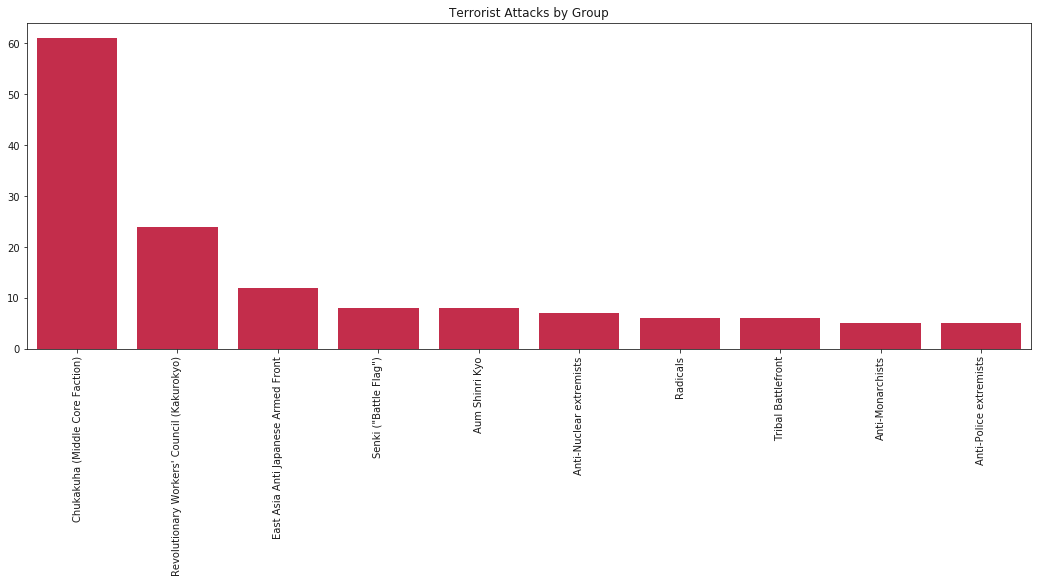

In [30]:
## Japan Top Groups DF 
Japantopgroup = list(Japan['Group'].value_counts()[1:11].index)
Japangroupplot = Japan[Japan['Group'].isin(Japantopgroup)]

plt.subplots(figsize=(18,6))
sns.barplot(Japan['Group'].value_counts()[1:11].index,Japan['Group'].value_counts()[1:11].values,color='crimson')
plt.title('Terrorist Attacks by Group')
plt.xticks(rotation=90)
plt.show()

** The top 10 groups operating in Japan based on total Terrorist Attacks include: **
* Chukakuha 
* Revolutionary Workers' Council 
* East Asia Anti Japanese Armed Front 
* Senki 
* Aum Shinri Kyo (Less Attacks but more casualty impact) 
* Anti-Nuclear extremists 
* Radicals 
* Tribal Battlefront 
* Anti-Monarchists 
* Anti-Police extremists 

I wonder what their trends are considering I have not heard the name of most of these groups in recent media. 

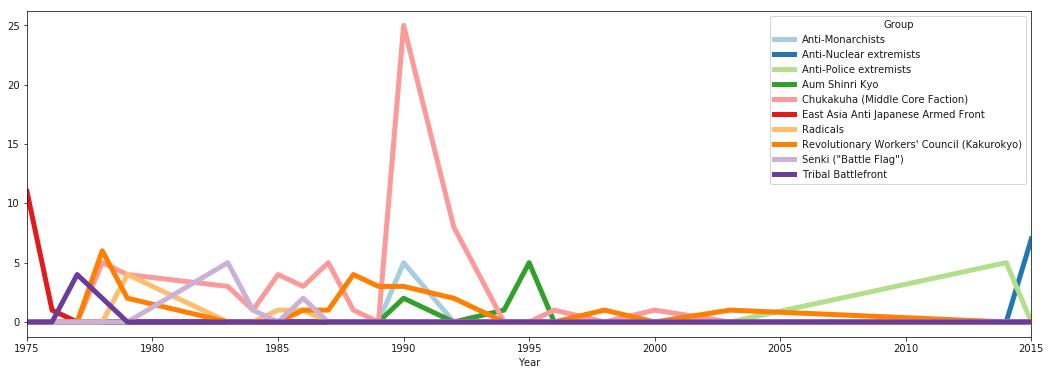

In [31]:
pd.crosstab(Japangroupplot.Year,Japangroupplot.Group).plot(kind='line',color=sns.color_palette('Paired', 10),linewidth=5)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

The time series chart above plots these groups historical activity trends. 

In regards to terror attack trends for groups in Japan, I could observe the below: 
* The Chukakuha seemed to be most active from the early 1990's 
* Aum Shinri Kyo peaked in 1995 (The year of the Sarin Gas Subway Attacks) 
* Anti-Police Extremists rose in the early 2000's but have since tapered off 
* Anti-Nuclear Extremists incidents have been on the rise recently (Possibly due to the recent Fukushima controversies)

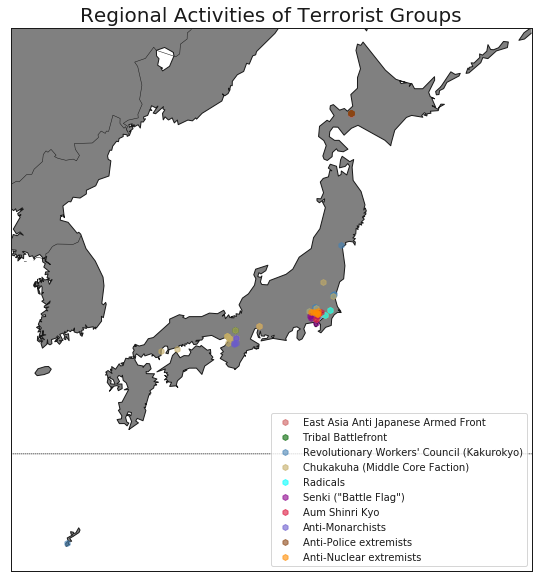

In [32]:
plt.subplots(figsize=(30,10))

# creating a Basemap object
gp = Basemap(projection='merc',llcrnrlon=lon0, llcrnrlat=lat0,
            urcrnrlon=lon1, urcrnrlat=lat1,  resolution='l')
gp.bluemarble()
gp.drawcoastlines()
gp.drawcountries()
gp.fillcontinents(color = 'gray')
gp.drawmapboundary()
gp.drawmeridians(np.arange(0, 360, 30))
gp.drawparallels(np.arange(-90, 90, 30))

colors=['indianred','darkgreen','steelblue','y','cyan','darkmagenta','crimson','slateblue','saddlebrown','darkorange']
group=list(Japangroupplot['Group'].unique())
def group_point(group,color,label):
    lat_group=list(Japangroupplot[Japangroupplot['Group']==group].Latitude)
    long_group=list(Japangroupplot[Japangroupplot['Group']==group].Longitude)
    x,y = gp(long_group,lat_group)
    gp.plot(x,y,'ro',markersize=6,color=j,label=i,alpha=.6,marker='h')
for i,j in zip(group,colors):
    group_point(i,j,i)  
legend=plt.legend(loc='lower right',frameon=True,prop={'size':10},fontsize = 'large')
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups', size=20)
plt.show()

The above plot details the top 10 groups on a map of Japan: 
Most groups activities were centered around Tokyo other than the Anti-Monarchists and Chukakuha. 

### 2.4 Attributes of Terrorism in Japan

The next section visualizes various descriptive attributes related to terrorism like Target Types, Type of Attack, and Weapons used. 

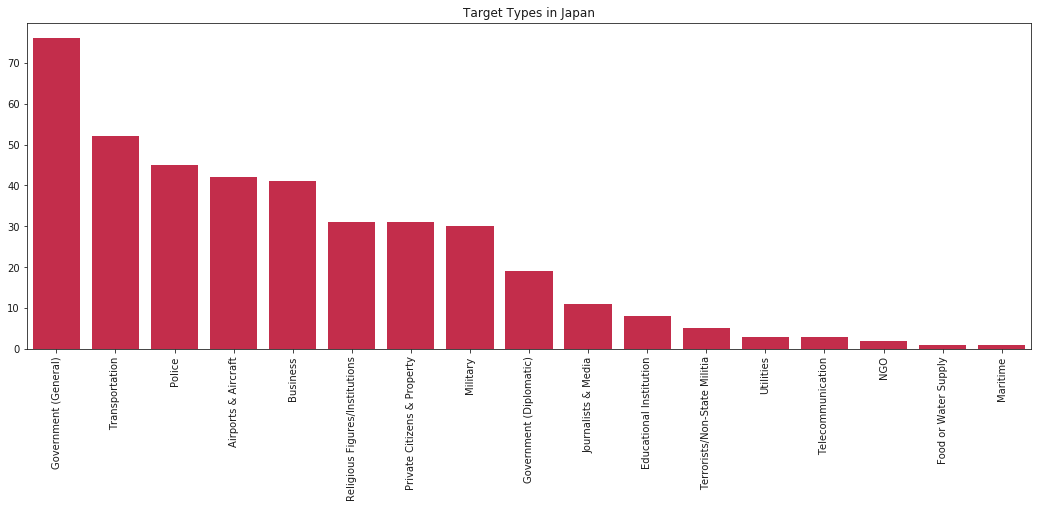

In [33]:
plt.subplots(figsize=(18,6))
sns.barplot(Japan['Targettype'].value_counts().index,Japan['Targettype'].value_counts().values,color='crimson')
plt.title('Target Types in Japan')
plt.xticks(rotation=90)
plt.show()

Japan's most impacted targets in Japan include Government, Transportation, Police, Airports & Aircraft, and Business. 

Transportation/Airports & Aircraft are not as common of targets for all nations in the aggregate. Japan's experiences more attacks in this regard. 


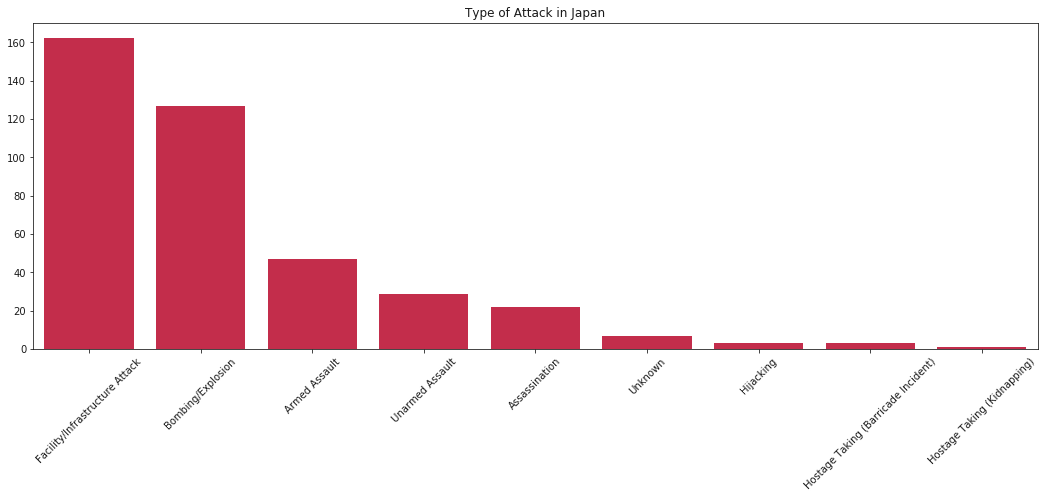

In [34]:
plt.subplots(figsize=(18,6))
sns.barplot(Japan['Attacktype'].value_counts().index,Japan['Attacktype'].value_counts().values,color='crimson')
plt.title('Type of Attack in Japan')
plt.xticks(rotation=45)
plt.show()

As seen from the above chart, the most common attack types in Japan included Facility/Infrastructure, Bombing/Explosion, Armed Assault, Unarmed Assault, and Assassinations. 

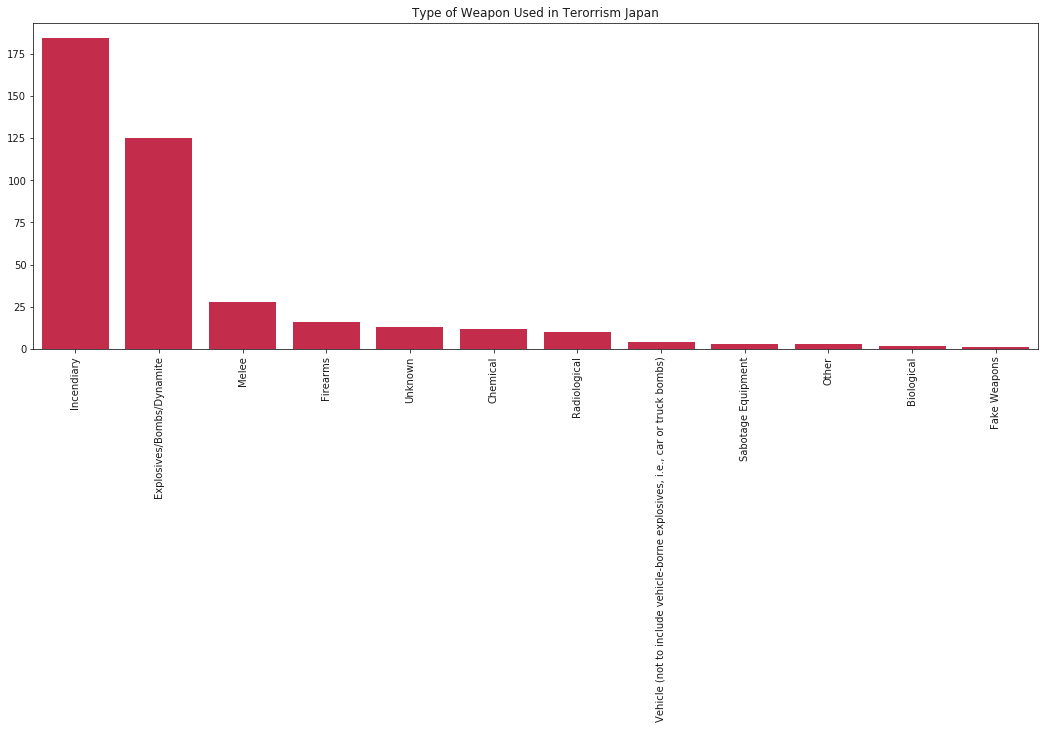

In [35]:
plt.subplots(figsize=(18,6))
sns.barplot(Japan['Weapontype'].value_counts().index,Japan['Weapontype'].value_counts().values,color='crimson')
plt.title('Type of Weapon Used in Terorrism Japan')
plt.xticks(rotation=90)
plt.show()

According to the data, the most common weapons used in Japan's attacks were Incendiary, Explosives, Melee, and Firearms'

When examining casualty rates, 3 out of 4 of Japan's highest casualty inflicting attacks were chemical based which is a true testament to the destructive power of chemical weapons.

### 2.5 Impacts of Terrorism in Japan 

I decided to use the two statistics of Success Rates and Total Casualties as indicators of impact. These graphs can be seen below. 

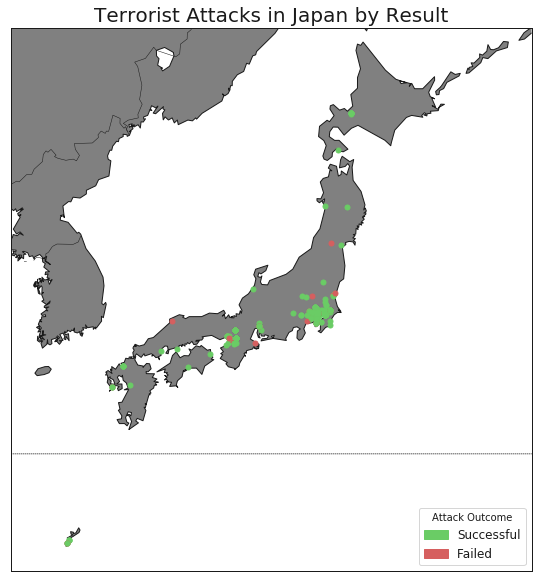

In [36]:
plt.subplots(figsize=(30,10))
# setting the two corners of the map 
lon0, lat0 = (125, 25)
lon1, lat1 = (150, 46)

lats = list(Japan['Latitude'])
lons = list(Japan['Longitude'])
successful = list(Japan['Success'])

def get_marker_color(success):
    if success == 1:
        return ('g')
    else:
        return ('r')

# creating a Basemap object
j = Basemap(projection='merc',llcrnrlon=lon0, llcrnrlat=lat0,
            urcrnrlon=lon1, urcrnrlat=lat1,  resolution='l')
j.bluemarble()
j.drawcoastlines()
j.drawcountries()
j.fillcontinents(color = 'gray')
j.drawmapboundary()
j.drawmeridians(np.arange(0, 360, 30))
j.drawparallels(np.arange(-90, 90, 30))

for lon, lat, success in zip(lons, lats, successful):
    x,y = j(lon, lat)
    marker_string = get_marker_color(success)
    j.plot(x, y, 'ro', color=marker_string, markersize=5)

#create legend
low = mpatches.Patch(color='g', label='Successful')
med = mpatches.Patch(color='r', label='Failed')
plt.legend(handles=[low,med], title='Attack Outcome',fontsize = 'large')

plt.title('Terrorist Attacks in Japan by Result', size=20)
plt.show()

Around 85 % of attacks in Japan were successful which can be seen in the above map by location. 

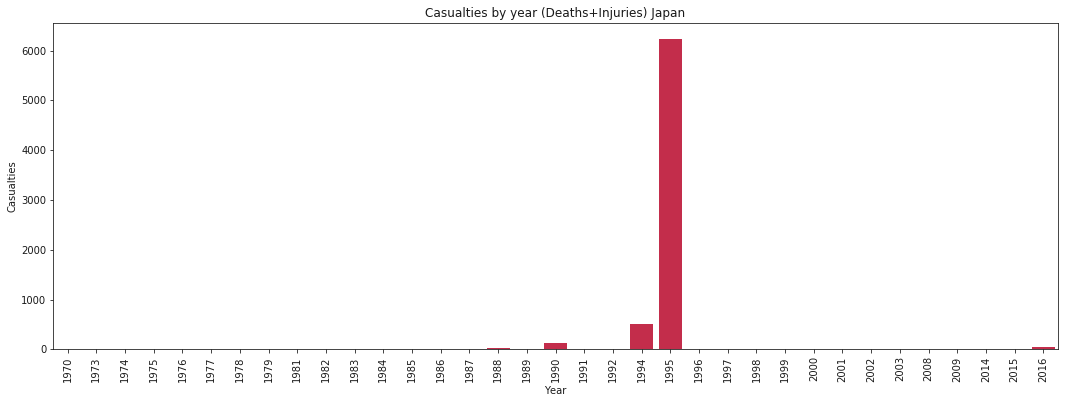

In [37]:
CasualtytrendJapan = Japan.groupby(["Year"])["Casualties"].sum()
plt.subplots(figsize=(18,6))
sns.barplot(CasualtytrendJapan.index,CasualtytrendJapan,color='crimson')
plt.title('Casualties by year (Deaths+Injuries) Japan')
plt.xticks(rotation=90)
plt.show()

Comparitively speaking Japan has much less casualties due to Terrorist Attacks compared to the rest of the world. Japan often has years where no casualties are recorded but the most gruesome years were 1995, 1994, and 1990. 

The average casualty count per all countries from 1970-2016 was around 4,000 but Japan had around 7013 casualties from 1970-2016. This was heavily due to the 1995 Aum Shinri Kyo attack injuring so many people on the crowded subways.  

## III. Terrorism in the USA 

In the next section, I will be examining Terrorism in my home country the USA. 

In [38]:
## USA DF 
America = data[data['Country'] == 'United States']
America.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2758 entries, 5 to 169902
Data columns (total 22 columns):
Id               2758 non-null int64
Year             2758 non-null int64
Country          2758 non-null object
Region           2758 non-null object
Provstate        2758 non-null object
City             2758 non-null object
Latitude         2757 non-null float64
Longitude        2757 non-null float64
Summary          1704 non-null object
Success          2758 non-null int64
Suicide          2758 non-null int64
Attacktype       2758 non-null object
Targettype       2758 non-null object
Targetsubtype    2638 non-null object
Target           2713 non-null object
Nationality      2749 non-null object
Group            2758 non-null object
Weapontype       2758 non-null object
Weaponsubtype    2499 non-null object
Killed           2685 non-null float64
Wounded          2665 non-null float64
Casualties       2758 non-null float64
dtypes: float64(5), int64(4), object(13)
memory usage:

In [39]:
2758 / 170350 

0.016190196653947754

1.6 % of attacks in the entire dataset took place in the United States.

### 3.1 Terrorism in the USA Map/Trends

This section gives a general overview on Terrorism trends in the USA as well as locations of impact. 

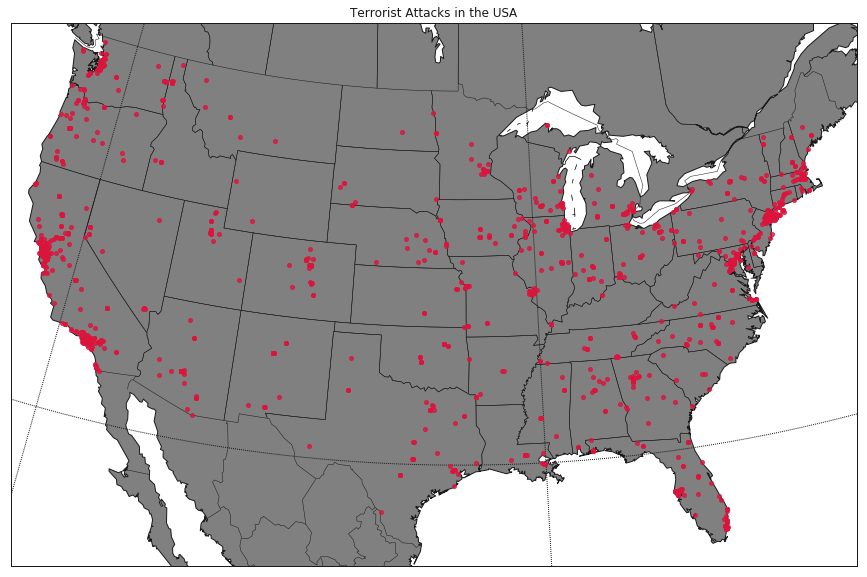

In [40]:
plt.subplots(figsize=(30,10))
lats = list(America['Latitude'])
lons = list(America['Longitude'])
magnitudes = list(America['Casualties'])

USA = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
      urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
      lon_0=-95, resolution='l', area_thresh=10000)
USA.bluemarble()
USA.drawcoastlines()
USA.drawcountries()
USA.fillcontinents(color = 'gray')
USA.drawmapboundary()
USA.drawmeridians(np.arange(0, 360, 30))
USA.drawparallels(np.arange(-90, 90, 30))
USA.drawstates()

x,y = USA(lons, lats)
USA.plot(x, y, 'ro', markersize=4,color='crimson',alpha=.8)
title_string = "Terrorist Attacks in the USA"
plt.title(title_string)
plt.show()

The next map plots all of the terrorist attacks that have occured in the USA from 1970-2016. They seem to be heavily centered around population centers like San Francisco, Los Angelos, NYC, Chicago and other big cities.

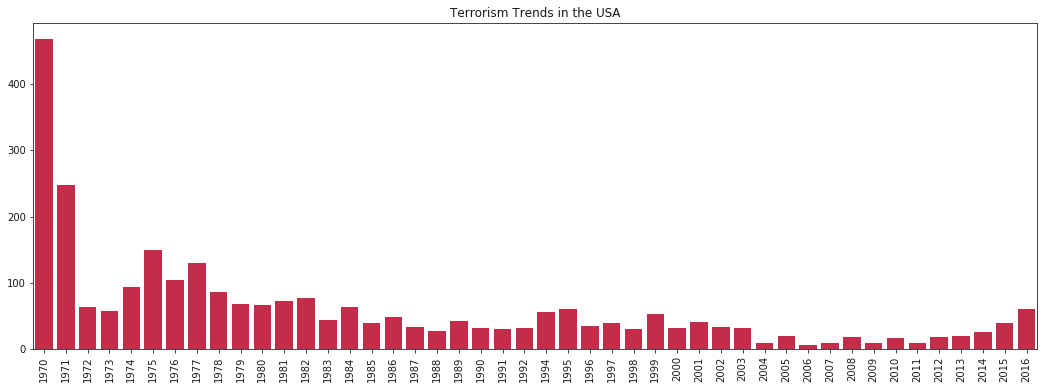

In [41]:
plt.subplots(figsize=(18,6))
sns.barplot(America['Year'].value_counts().index,America['Year'].value_counts().values,color='crimson')
plt.title('Terrorism Trends in the USA')
plt.xticks(rotation=90)
plt.show()

The next bar graph details the total terrorist attacks from 1970-2016 in the USA. From the looks of this graph, terrorism peaked in the earlier 1970's and has been on a downward trend since. 

The biggest drop in terrorism seemed to happen after 2001 but has again since been on the rise since 2011. 

In [42]:
America = America.sort_values(by=['Casualties'], ascending=False)
America.head(5)

,Id,Year,Country,Region,Provstate,City,Latitude,Longitude,Summary,Success,Suicide,Attacktype,Targettype,Targetsubtype,Target,Nationality,Group,Weapontype,Weaponsubtype,Killed,Wounded,Casualties
73054,200109110004,2001,United States,North America,New York,New York City,40.712784,-74.005941,09/11/2001: This was one of four related attac...,1,1,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Passengers and crew members on American Airlin...,United States,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,NaN,1383.0,7366.0,8749.0
73055,200109110005,2001,United States,North America,New York,New York City,40.712784,-74.005941,09/11/2001: This was one of four related attac...,1,1,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Passengers and crew members on United Airlines...,United States,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,NaN,1382.0,7365.0,8747.0
58966,199504190004,1995,United States,North America,Oklahoma,Oklahoma City,35.472015,-97.520354,NaN,1,0,Bombing/Explosion,Government (General),Government Building/Facility/Office,Alfred P. Murrah Federal Building,United States,Anti-Government extremists,Explosives/Bombs/Dynamite,Vehicle,168.0,650.0,818.0
23239,198409200009,1984,United States,North America,Oregon,The Dalles,45.601555,-121.183434,NaN,1,0,Unarmed Assault,Business,Restaurant/Bar/Café,Salad Bars,United States,Rajneeshees,Biological,NaN,0.0,751.0,751.0
73056,200109110006,2001,United States,North America,Virginia,Arlington,38.880777,-77.108273,09/11/2001: This was one of four related attac...,1,1,Hijacking,Government (General),Government Building/Facility/Office,Passengers and crew members on American Airlin...,United States,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,NaN,189.0,106.0,295.0


The next dataframe details America's most devastating attacks by  Casualty counts. The top two attacks were the 9/11 WTC attacks followed by the Oklahoma Unibomber attack.

### 3.2 Terrorist Groups in the USA

Next, I will examine the top operating terrorist groups in the United States. 

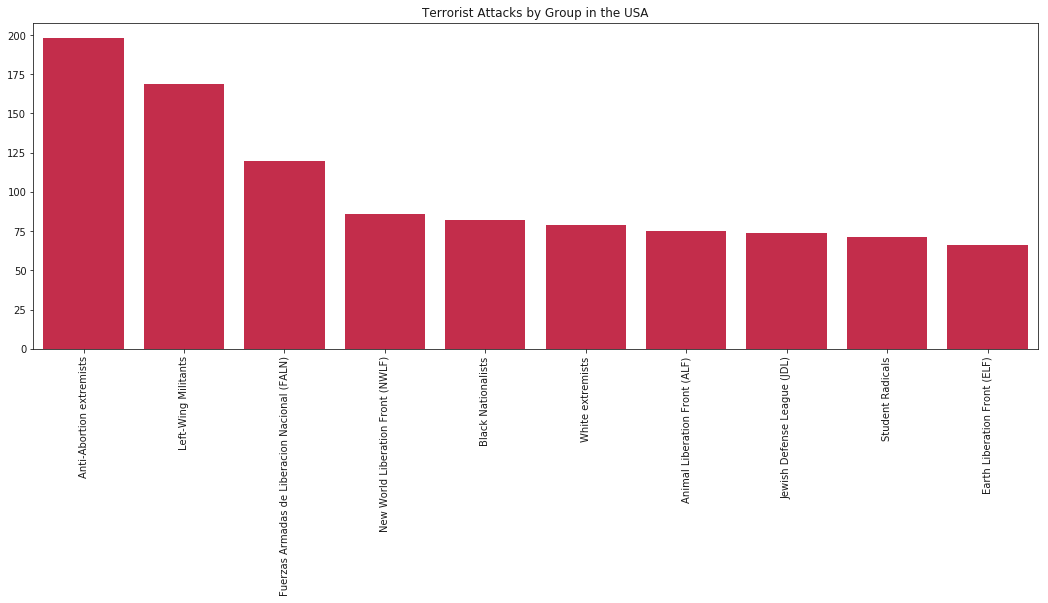

In [43]:
Americatopgroup = list(America['Group'].value_counts()[1:11].index)
Americagroupplot = America[America['Group'].isin(Americatopgroup)]

plt.subplots(figsize=(18,6))
sns.barplot(America['Group'].value_counts()[1:11].index,America['Group'].value_counts()[1:11].values,color='crimson')
plt.title('Terrorist Attacks by Group in the USA')
plt.xticks(rotation=90)
plt.show()

Currently the Top 10 Operating Terrorist Groups in the USA include the Anti-Abortion extremists, Left-Wing Militants, FALN, NWLF, Black Nationalists, White Extremists, ALF, JDL, Student Radicals and the ELF. 

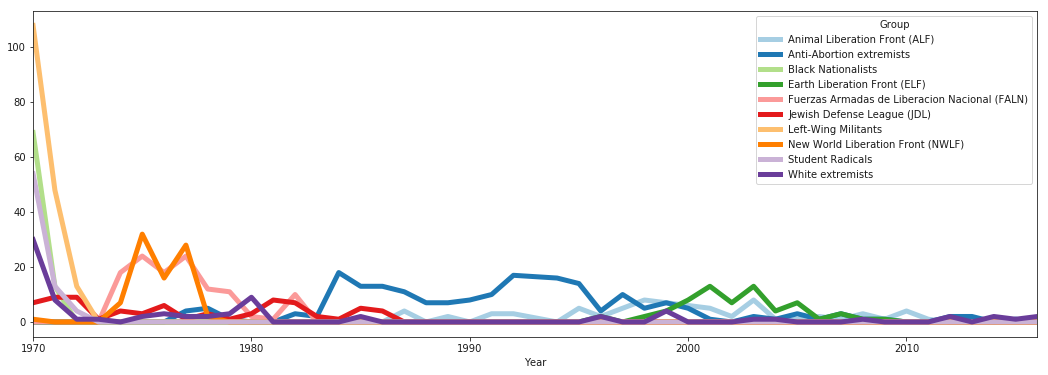

In [44]:
pd.crosstab(Americagroupplot.Year,Americagroupplot.Group).plot(kind='line',color=sns.color_palette('Paired', 10),linewidth=5)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

The next graph details these groups activity trends from 1970 until 2016. All of these groups are relatively inactive compared to their activities in the early 70s. 

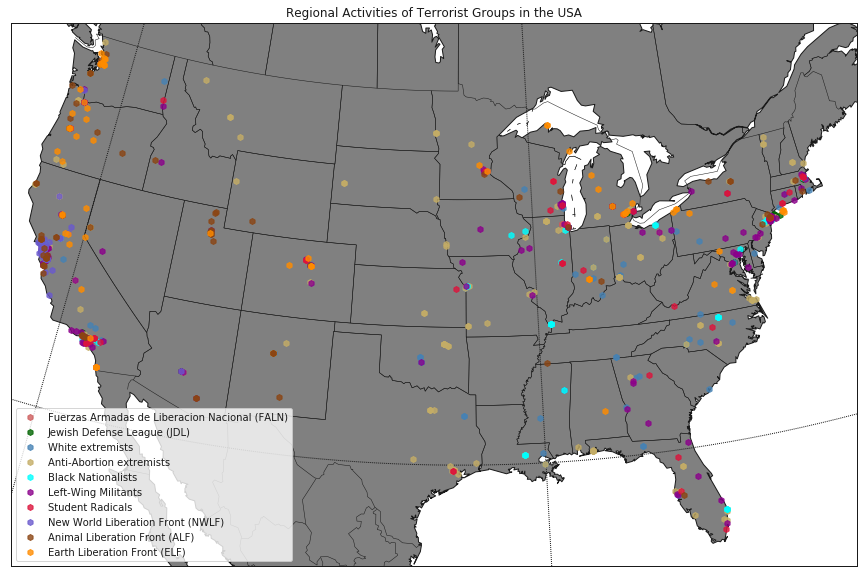

In [45]:
plt.subplots(figsize=(30,10))

# creating a Basemap object
USA = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
      urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
      lon_0=-95, resolution='l', area_thresh=10000)
USA.bluemarble()
USA.drawcoastlines()
USA.drawcountries()
USA.fillcontinents(color = 'gray')
USA.drawmapboundary()
USA.drawmeridians(np.arange(0, 360, 30))
USA.drawparallels(np.arange(-90, 90, 30))
USA.drawstates()

colors=['indianred','darkgreen','steelblue','y','cyan','darkmagenta','crimson','slateblue','saddlebrown','darkorange']
group=list(Americagroupplot['Group'].unique())
def group_point(group,color,label):
    lat_group=list(Americagroupplot[Americagroupplot['Group']==group].Latitude)
    long_group=list(Americagroupplot[Americagroupplot['Group']==group].Longitude)
    x,y = USA(long_group,lat_group)
    USA.plot(x,y,'ro',markersize=6,alpha=.8,color=j,label=i,marker='h')
for i,j in zip(group,colors):
    group_point(i,j,i)  
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10},fontsize = 'large')
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups in the USA')
plt.show()

The above map plots the group activities based on their locations. I cannot really see any clear trends regarding where the groups operate. Activities for most groups seem to be nationwide for the most part. 

### 3.3 Attributes of Terrorism in the USA

The next section visualizes various descriptive attributes related to terrorism like Target Types, Type of Attack, and Weapons used. 

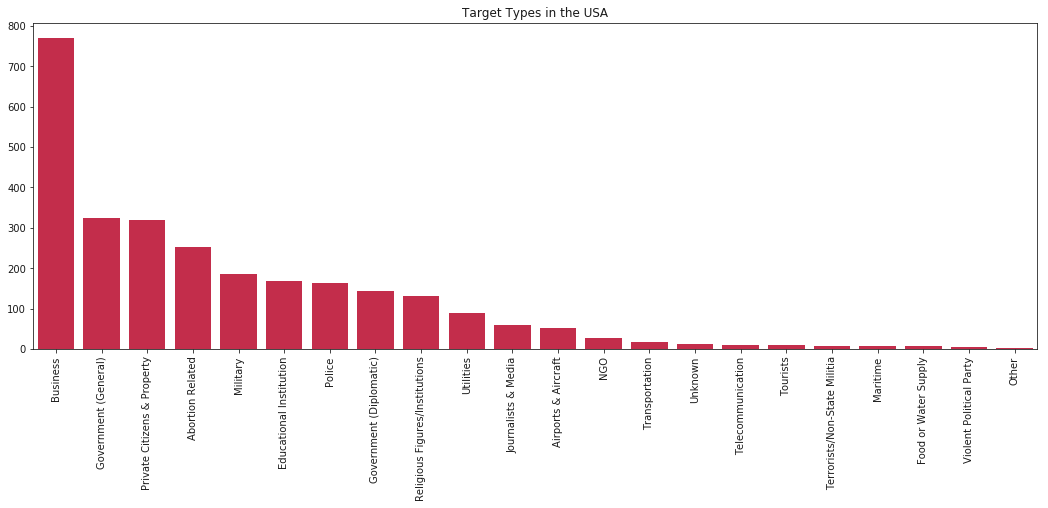

In [46]:
plt.subplots(figsize=(18,6))
sns.barplot(America['Targettype'].value_counts().index,America['Targettype'].value_counts().values,color='crimson')
plt.title('Target Types in the USA')
plt.xticks(rotation=90)
plt.show()

The next graph details Target Types in the USA. 

Top five target types in the USA were Business, Government (General), Private Citizens & Property, Abortion Related, and Military. 

The target types differ from Japan greatly which had more infrastructure related attacks.  

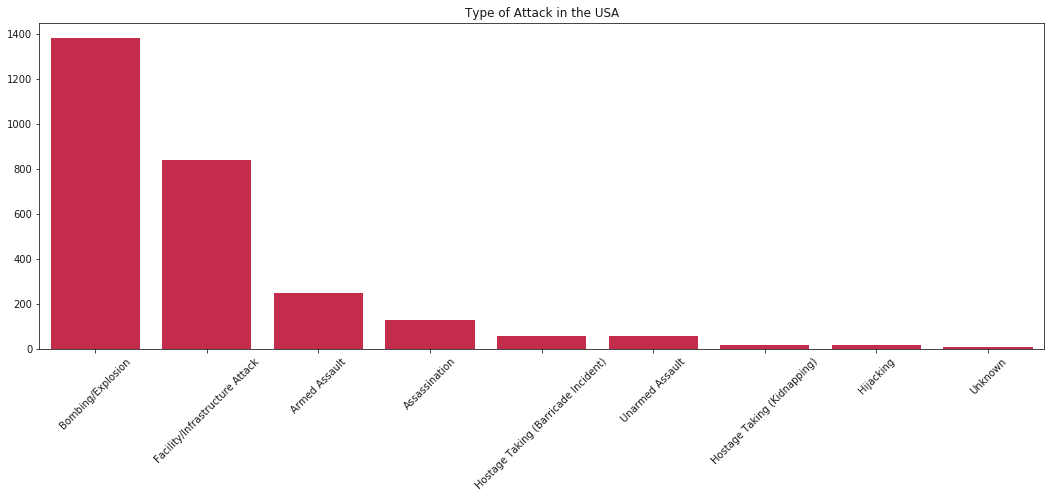

In [47]:
plt.subplots(figsize=(18,6))
sns.barplot(America['Attacktype'].value_counts().index,America['Attacktype'].value_counts().values,color='crimson')
plt.title('Type of Attack in the USA')
plt.xticks(rotation=45)
plt.show()

The next bar graph details the most common attacks in the United States. 

An Overwhelming majority of attacks seem to be Bombings, Facility/ Infrastructure Attacks, as well as Armed Assaults. 

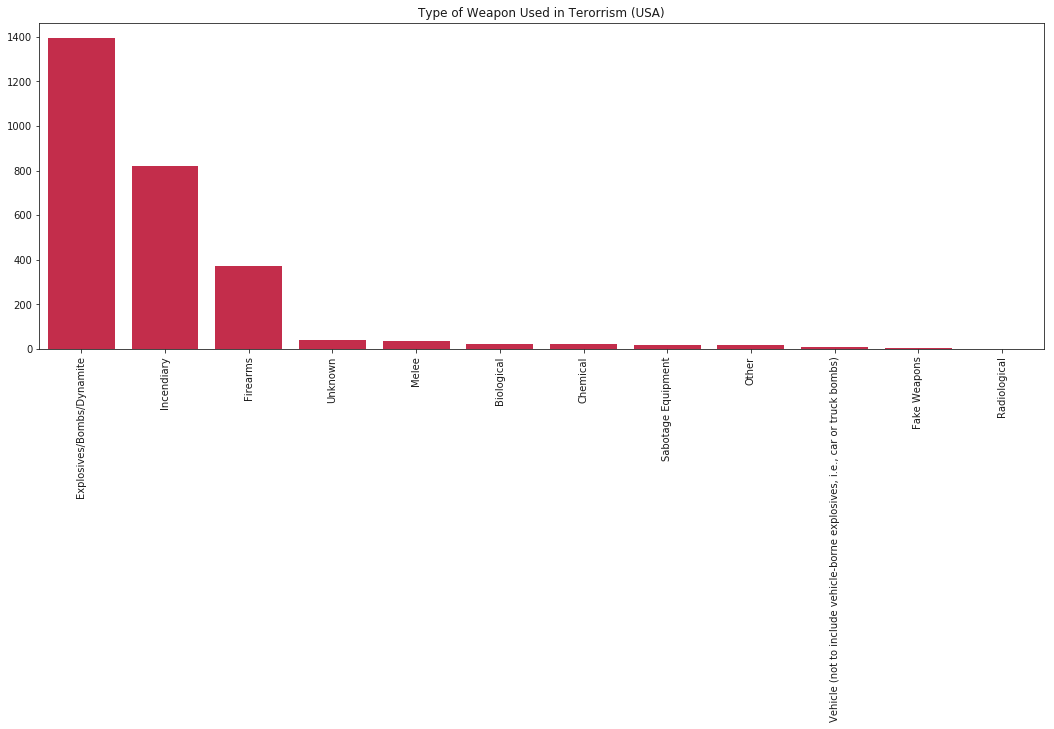

In [48]:
plt.subplots(figsize=(18,6))
sns.barplot(America['Weapontype'].value_counts().index,America['Weapontype'].value_counts().values,color='crimson')
plt.title('Type of Weapon Used in Terorrism (USA)')
plt.xticks(rotation=90)
plt.show()

The next graph details the most common weapons used in attacks. The majority of all attacks in the USA were conducted with Explosives, Incendiary, and Firearms. 

### 3.4 Impacts of Terrorism in the USA

I decided to use the two statistics of Success Rates and Total Casualties as indicators of impact. These graphs can be seen below. 

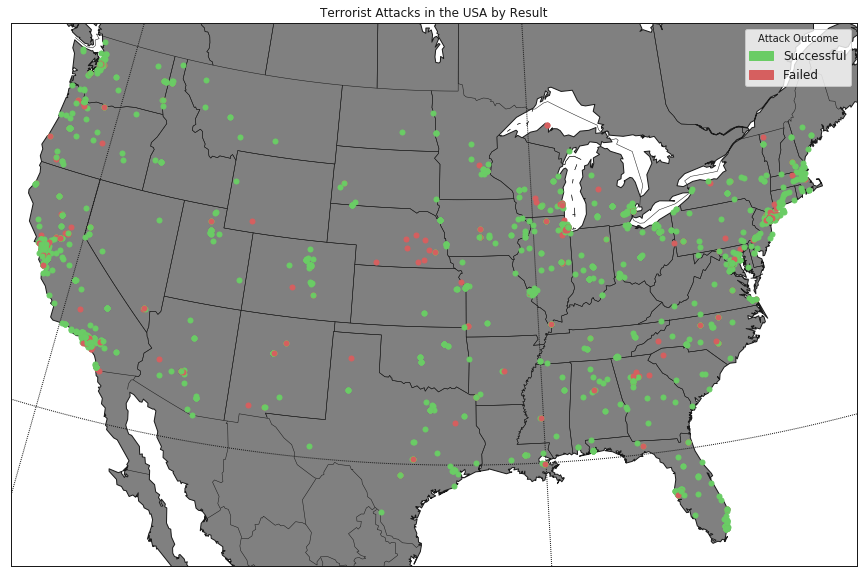

In [49]:

plt.subplots(figsize=(30,10))

lats = list(America['Latitude'])
lons = list(America['Longitude'])
successful = list(America['Success'])

def get_marker_color(success):
    if success == 1:
        return ('g')
    else:
        return ('r')

# creating a Basemap object
USA = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
      urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
      lon_0=-95, resolution='l', area_thresh=10000)
USA.bluemarble()
USA.drawcoastlines()
USA.drawcountries()
USA.fillcontinents(color = 'gray')
USA.drawmapboundary()
USA.drawmeridians(np.arange(0, 360, 30))
USA.drawparallels(np.arange(-90, 90, 30))
USA.drawstates()

for lon, lat, success in zip(lons, lats, successful):
    x,y = USA(lon, lat)
    marker_string = get_marker_color(success)
    USA.plot(x, y, 'ro', color=marker_string, markersize=5)

#create legend
low = mpatches.Patch(color='g', label='Successful')
med = mpatches.Patch(color='r', label='Failed')
plt.legend(handles=[low,med], title='Attack Outcome',fontsize = 'large')

plt.title('Terrorist Attacks in the USA by Result')
plt.show()


The above map provides an additional dimension to the data and plots successful vs unsuccessful terrorist attacks in the United States. 

As an odd side note, Attacks in Nebraska seem to not have a very high success rate. 

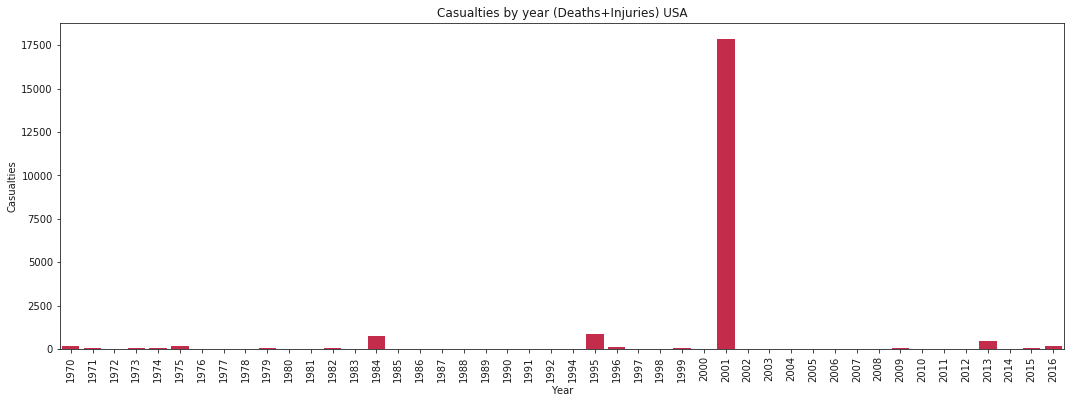

In [50]:
CasualtytrendAmerica = America.groupby(["Year"])["Casualties"].sum()
plt.subplots(figsize=(18,6))
sns.barplot(CasualtytrendAmerica.index,CasualtytrendAmerica,color='crimson')
plt.title('Casualties by year (Deaths+Injuries) USA')
plt.xticks(rotation=90)
plt.show()

Lastly, I will examine Casualty counts in the United States from 1970-2016. 

The most impactful year was 2001 when the 9/11 Terrorist Attacks occurred with a casualty count of around 17500. All other years fail in comparison due to the sheer devastation of this attack. 

The next two most violent years including 1984 and 1995 can be seen in comparison to 2001 above.  

## IV. Terrorism Metrics

Next, I created a summary dataframe aggregating key statistics in terrorism related to total attacks, suicide attacks, successful attacks, distinct groups, total killed, total wounded, and casualties to better illustrate country differences. 

In [51]:
## Terrorism Metrics 
Terrorx = pd.DataFrame()

TerrorMetric = data.groupby('Country')['Suicide'].agg(['sum','count'])
TerrorMetric2 = data.groupby('Country')['Success'].agg(['sum','count'])
TerrorMetric4 = data.groupby('Country')['Killed'].agg(['sum','count'])
TerrorMetric5 = data.groupby('Country')['Wounded'].agg(['sum','count'])
TerrorMetric6 = data.groupby('Country')['Casualties'].agg(['sum','count'])

Terrorx['TotalAttacks'] = TerrorMetric['count']
Terrorx['SuicideAttacks'] = TerrorMetric['sum']
Terrorx['SuccessfulAttacks'] = TerrorMetric2['sum']
Terrorx['DistinctGroups'] = data.groupby('Country')['Group'].nunique()
Terrorx['Killed'] = TerrorMetric4['sum']
Terrorx['Wounded'] = TerrorMetric5['sum']
Terrorx['Casualty'] = TerrorMetric6['sum']
Terrorx['SuicideRatio'] = TerrorMetric['sum']/TerrorMetric['count']
Terrorx['SuccessRatio'] = TerrorMetric2['sum']/TerrorMetric2['count']
Terrorx['KilledRatio'] = TerrorMetric4['sum']/TerrorMetric4['count']
Terrorx['WoundedRatio'] = TerrorMetric5['sum']/TerrorMetric5['count']
Terrorx['CasualtyRatio'] = TerrorMetric6['sum']/TerrorMetric6['count']

In [52]:
Terrorx[Terrorx.index == 'Japan'] 

,TotalAttacks,SuicideAttacks,SuccessfulAttacks,DistinctGroups,Killed,Wounded,Casualty,SuicideRatio,SuccessRatio,KilledRatio,WoundedRatio,CasualtyRatio
Country,,,,,,,,,,,,
Japan,401,0,340,50,66.0,6998.0,7013.0,0.0,0.84788,0.177419,18.71123,17.488778


A quick reference card I created gives a quick summary on Japan's Terrorist Attacks in the aggregate.

** From 1970-2016: **
* Total Attacks: 401 
* Suicide Attacks: 0 
* Successful Attacks: 340 
* Distinct Groups That Operated in Japan: 50 
* Killed: 66 
* Wounded: 6998 
* Casualty Count(Killed+Wounded): 7013 

In [53]:
Terrorx[Terrorx.index == 'United States'] 

,TotalAttacks,SuicideAttacks,SuccessfulAttacks,DistinctGroups,Killed,Wounded,Casualty,SuicideRatio,SuccessRatio,KilledRatio,WoundedRatio,CasualtyRatio
Country,,,,,,,,,,,,
United States,2758,9,2274,229,3648.0,18095.0,21739.0,0.003263,0.824511,1.358659,6.789869,7.882161


A quick reference card I created gives a quick summary on America's' Terrorist Attacks in the aggregate.

** From 1970-2016: **
* Total Attacks: 2758 
* Suicide Attacks: 9  
* Successful Attacks: 2274 
* Distinct Groups That Operated in Japan: 229 
* Killed: 3648 
* Wounded: 18,095 
* Casualty Count(Killed+Wounded): 21,739 

Various statistics related to terrorist attacks in Japan/USA can be seen in the above Dataframe and compared. 

## V. Conclusion

That concludes my analysis on Terrorist attacks globally, the USA, and Japan. I learned alot about Terrorism and data exploration techniques via python. 

I would like to thank the National Consortium for the Study of Terrorism and Responses to Terrorism (START) for providing such a clean and comprehensive dataset. Hopefully this analysis can be used to better understand terrorist activities around the world to reduce their impact and occurence in the future. 
